# SNOW partitioning parallel
The filter is used to perform SNOW algorithm in parallel and serial mode to save computational time and memory requirement respectively. [SNOW](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.96.023307) algorithm converts a binary image in to partitioned regions while avoiding oversegmentation. SNOW_partitioning_parallel speeds up this process by decomposing the domain into several subdomains and either process them in different cores in parallel to save time or one by one in single core to save memory requirements.     

In [1]:
import numpy as np
import porespy as ps
from porespy.tools import randomize_colors
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(2, 4)
gs.update(wspace=0.5)
np.random.seed(10)
ps.visualization.set_mpl_style()

## Create a random image of overlapping spheres

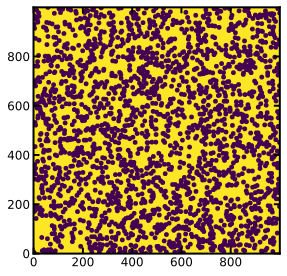

In [2]:
im = ps.generators.overlapping_spheres([1000, 1000], r=10, porosity=0.5)
fig, ax = plt.subplots()
ax.imshow(im, origin='lower');

## Apply SNOW_partitioning_parallel on the binary image 
Parallelization is done by dividing the image into chunks and processes each separately.  The results are stitched back together to make a full image.  The process is explored and explained in our publication in [Advances in Water Resources](https://doi.org/10.1016/j.advwatres.2020.103734).  There is a dedicated function in ``porespy.filters`` for this.  Settings ``divs=2`` means a 2D images is divided into two chunks in each direction for a total of 4:

In [3]:
snow_out = ps.filters.snow_partitioning_parallel(
    im=im, divs=2, r_max=5, sigma=0.4)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

The result will be indentical to the serial version if sufficient overlap was chosen between the chunks.  There is an automated computation of this overap in the function.  The results are shown below:

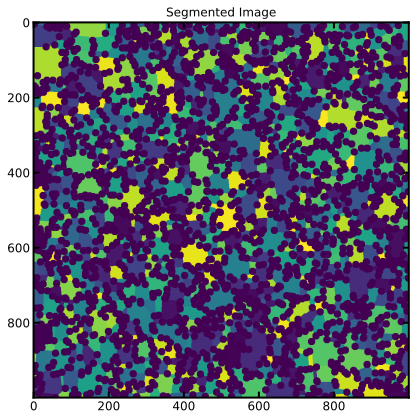

In [4]:
fig, ax = plt.subplots(1, 1, figsize=[6, 6])
ax.imshow(randomize_colors(snow_out.regions));
ax.set_title('Segmented Image');

In [5]:
print(f"Number of regions: {snow_out.regions.max()}")

Number of regions: 980
